## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from fastai import *
from fastai.tabular import * 

SEED = 666

# magic word for producing visualizations in notebook
%matplotlib inline

# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

In [2]:
census_columns = [
    'age',
    'class of worker',
    'detailed industry recode',
    'detailed occupation recode',
    'education',
    'wage per hour',
    'enroll in edu inst last wk',
    'marital status',
    'major industry code',
    'major occupation code',
    'race',
    'hispanic origin',
    'sex',
    'member of a labor union',
    'reason for unemployment',
    'full or part time employment stat',
    'capital gains',
    'capital losses',
    'dividends from stocks',
    'tax filer stat',
    'region of previous residence',
    'state of previous residence',
    'detailed household and family stat',
    'detailed household summary in household',
    'instance weight',
    'migration code-change in msa',
    'migration code-change in reg',
    'migration code-move within reg',
    'live in this house 1 year ago',
    'migration prev res in sunbelt',
    'num persons worked for employer',
    'family members under 18',
    'country of birth father',
    'country of birth mother',
    'country of birth self',
    'citizenship',
    'own business or self employed',
    'fill inc questionnaire for veteran\'s admin',
    'veterans benefits',
    'weeks worked in year',
    'year',
    'income class'
]

features_to_drop = ['instance weight']

categorical_features = ['class of worker',
                        'detailed industry recode',
                        'detailed occupation recode',
                        'education',
                        'marital status',
                        'major industry code',
                        'major occupation code',
                        'race',
                        'hispanic origin',
                        'sex',
                        'full or part time employment stat',
                        'tax filer stat',
                        'detailed household and family stat',
                        'detailed household summary in household',
                        'migration code-change in msa',
                        'migration code-change in reg',
                        'migration code-move within reg',
                        'live in this house 1 year ago',
                        'country of birth father',
                        'country of birth mother',
                        'country of birth self',
                        'citizenship',
                        'own business or self employed',
                        'veterans benefits',
                        'enroll in edu inst last wk',
                        'member of a labor union',
                        'reason for unemployment',
                        'region of previous residence',
                        'state of previous residence',
                        'migration prev res in sunbelt',
                        'family members under 18',
                        "fill inc questionnaire for veteran\'s admin",
                        'year']

numerical_features = ['age',
                      'wage per hour',
                      'capital gains',
                      'capital losses',
                      'dividends from stocks',
                      'num persons worked for employer',
                      'weeks worked in year']

label_feature = 'income class'

## Load Datasets

### Train

In [3]:
# The C engine doesn't support RegEx so we set it to Python to avoid the warning
census = pd.read_csv('data/census-income.data', header=None, sep=',\s', na_values=['?'], engine='python')

In [4]:
census.columns = census_columns
census.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income class
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [5]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital status                              199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

### Load Test Dataset

In [6]:
# The C engine doesn't support RegEx so we set it to Python to avoid the warning
census_test = pd.read_csv('data/census-income.test', header=None, sep=',\s', na_values=['?'], engine='python')

In [7]:
census_test.columns = census_columns
census_test.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income class
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


 ## Clean Datasets

In [8]:
def clean_dataset(df):
    # Drop features
    df = df.drop(features_to_drop, axis=1)
    
    # Fill NaN
    df['hispanic origin'] = df['hispanic origin'].fillna('Do not know')
    df['migration code-change in msa'] = df['migration code-change in msa'].fillna('Not identifiable')
    
    df['state of previous residence'] = df['state of previous residence'].fillna('Not in universe')
    df['migration code-change in reg'] = df['migration code-change in reg'].fillna('Not in universe')
    df['migration code-move within reg'] = df['migration code-move within reg'].fillna('Not in universe')
    df['migration prev res in sunbelt'] = df['migration prev res in sunbelt'].fillna('Not in universe')
    
    df['country of birth father'] = df['country of birth father'].fillna(df['country of birth father'].mode()[0])
    df['country of birth mother'] = df['country of birth mother'].fillna(df['country of birth mother'].mode()[0])
    df['country of birth self'] = df['country of birth self'].fillna(df['country of birth self'].mode()[0])
    
#     df[categorical_features] = df[categorical_features].astype('category')
    
    # Encode income class column
    df['income class'] = df['income class'].map({'- 50000.': 0, '50000+.': 1})
    
    

    return df

### Train

In [9]:
census = clean_dataset(census)
census.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income class
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


In [10]:
census.to_csv('data/train.csv', index=False)

### Test

In [11]:
census_test = clean_dataset(census_test)
census_test.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital status,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income class
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,...,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,0
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,0
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,0
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,0
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,0


In [12]:
census_test.to_csv('data/test.csv', index=False)

## Sampling

Class 0: 187141
Class 1: 12382
Proportion: 15.11 : 1


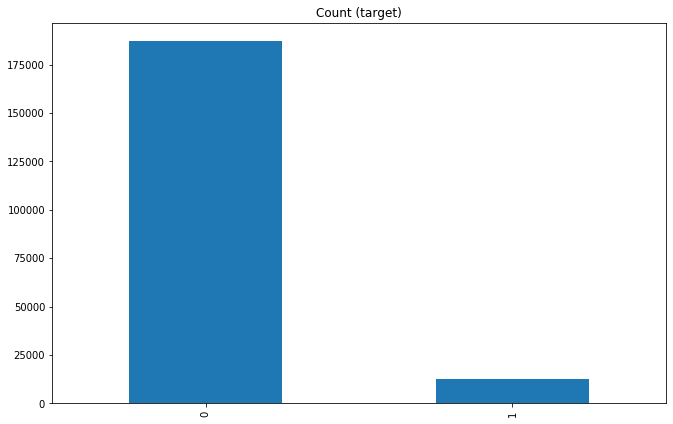

In [13]:
plt.figure(figsize=(5, 5))
total = census.shape[0]
ax = sns.countplot(x="income class", data=census)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{0:.2%}'.format(height/total),
            ha="center")
plt.title('Distribution of income classes', fontsize=15)
plt.show()

In [15]:
from imblearn.over_sampling import SMOTENC
cat_indexes = [census.columns.get_loc(c) for c in categorical_features if c in census]
sm = SMOTENC(categorical_features=cat_indexes, random_state=SEED)
X_res, y_res = sm.fit_resample(census.drop('income class', axis=1), census['income class'])
census_res = pd.concat([X_res, y_res], axis=1)

Using TensorFlow backend.


In [ ]:
plt.figure(figsize=(5, 5))
total = census_res.shape[0]
ax = sns.countplot(x="income class", data=census_res)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{0:.2%}'.format(height/total),
            ha="center")
plt.title('Distribution of income classes', fontsize=15)
plt.show()

## Fast.ai

In [16]:
procs = [FillMissing, Categorify, Normalize]

In [17]:
test = TabularList.from_df(census_test.drop('income class', axis=1), 
                           cat_names=categorical_features, 
                           cont_names=numerical_features, 
                           procs=procs)

In [18]:
train = TabularList.from_df(census_res, path='temp', 
                            cat_names=categorical_features, 
                            cont_names=numerical_features, 
                            procs=procs)

In [20]:
data = (train
            .split_by_rand_pct(valid_pct=0.2, seed=SEED)
            .label_from_df(cols=label_feature)
            .add_test(test, label=0)
            .databunch())

In [21]:
data.show_batch(rows=10)

class of worker,detailed industry recode,detailed occupation recode,education,marital status,major industry code,major occupation code,race,hispanic origin,sex,full or part time employment stat,tax filer stat,detailed household and family stat,detailed household summary in household,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,enroll in edu inst last wk,member of a labor union,reason for unemployment,region of previous residence,state of previous residence,migration prev res in sunbelt,family members under 18,fill inc questionnaire for veteran's admin,year,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,weeks worked in year,target
Private,31,2,Some college but no degree,Married-civilian spouse present,Utilities and sanitary services,Executive admin and managerial,White,All other,Male,Full-time schedules,Joint both under 65,Householder,Householder,Not identifiable,Not in universe,Not in universe,Not in universe under 1 year old,United-States,United-States,United-States,Native- Born in the United States,0,2,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,95,0.1240,-0.1907,-0.2033,-0.2365,-0.1646,1.3771,0.7435,1
Private,32,2,High school graduate,Married-civilian spouse present,Wholesale trade,Executive admin and managerial,White,All other,Male,Full-time schedules,Joint both under 65,Householder,Householder,Not identifiable,Not in universe,Not in universe,Not in universe under 1 year old,United-States,United-States,United-States,Native- Born in the United States,0,2,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,95,1.4128,-0.1907,-0.2033,-0.2365,0.7556,0.0958,0.7435,1
Private,42,2,Masters degree(MA MS MEng MEd MSW MBA),Divorced,Communications,Professional specialty,White,All other,Male,Full-time schedules,Single,Nonfamily householder,Householder,Not identifiable,Not in universe,Not in universe,Not in universe under 1 year old,United-States,United-States,United-States,Native- Born in the United States,0,2,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,95,-0.3056,-0.1907,2.0625,-0.2365,0.4407,0.9500,0.7435,1
Not in universe,0,0,9th grade,Never married,Not in universe or children,Not in universe,White,All other,Female,Children or Armed Forces,Single,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States,0,2,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Both parents present,Not in universe,94,-1.3259,-0.1907,-0.2033,-0.2365,-0.1646,-0.7584,-0.8137,0
Private,45,35,Masters degree(MA MS MEng MEd MSW MBA),Married-civilian spouse present,Other professional services,Precision production craft & repair,White,All other,Male,Full-time schedules,Joint both under 65,Householder,Householder,Not identifiable,Not in universe,Not in universe,Not in universe under 1 year old,United-States,United-States,United-States,Native- Born in the United States,0,2,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,95,0.1240,-0.1907,-0.2033,-0.2365,-0.1646,0.5229,0.7435,1
Private,32,3,Some college but no degree,Married-civilian spouse present,Wholesale trade,Executive admin and managerial,White,All other,Male,Children or Armed Forces,Joint both under 65,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,United-States,United-States,United-States,Native- Born in the United States,0,2,Not in universe,No,Not in universe,Not in univ

## Defining a model

In [34]:
learn = tabular_learner(data, layers=[1024,512], ps=[0.001,0.01], emb_drop=0.04, metrics=AUROC())

In [35]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(53, 15)
    (2): Embedding(48, 14)
    (3): Embedding(18, 8)
    (4): Embedding(8, 5)
    (5): Embedding(25, 10)
    (6): Embedding(16, 8)
    (7): Embedding(6, 4)
    (8): Embedding(10, 6)
    (9): Embedding(3, 3)
    (10): Embedding(9, 5)
    (11): Embedding(7, 5)
    (12): Embedding(39, 12)
    (13): Embedding(9, 5)
    (14): Embedding(10, 6)
    (15): Embedding(9, 5)
    (16): Embedding(10, 6)
    (17): Embedding(4, 3)
    (18): Embedding(43, 13)
    (19): Embedding(43, 13)
    (20): Embedding(43, 13)
    (21): Embedding(6, 4)
    (22): Embedding(4, 3)
    (23): Embedding(4, 3)
    (24): Embedding(4, 3)
    (25): Embedding(4, 3)
    (26): Embedding(7, 5)
    (27): Embedding(7, 5)
    (28): Embedding(51, 14)
    (29): Embedding(4, 3)
    (30): Embedding(6, 4)
    (31): Embedding(4, 3)
    (32): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(7, eps=1e-05, mome

In [36]:
learn.lr_find()

epoch,train_loss,valid_loss,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 5.75E-04
Min loss divided by 10: 6.92E-03


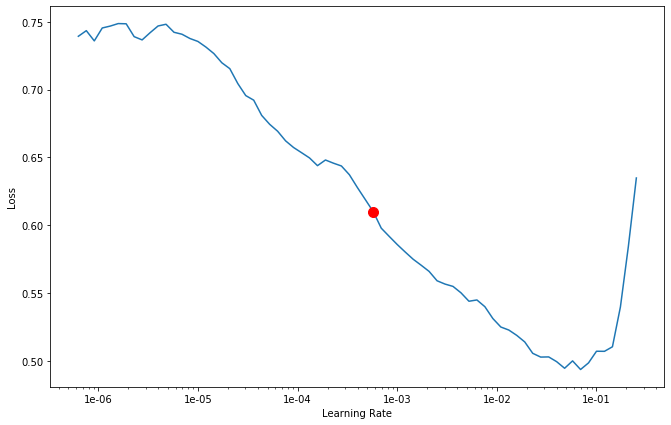

In [37]:
learn.recorder.plot(suggestion=True)

In [38]:
learn.fit_one_cycle(2, 5.75e-4, wd=0.2)

epoch,train_loss,valid_loss,auroc,time
0,0.212584,0.217690,0.973310,04:31
1,0.194869,0.184151,0.978514,04:38


epoch,train_loss,valid_loss,auroc,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 2.75E-07


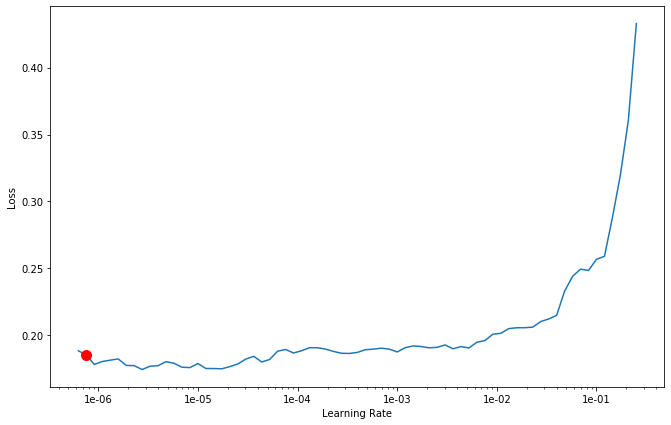

In [39]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [42]:
learn.fit_one_cycle(2, 7.59e-7, wd=0.2)

epoch,train_loss,valid_loss,auroc,time
0,0.181262,0.183295,0.978685,04:38
1,0.192391,0.184261,0.978440,04:45


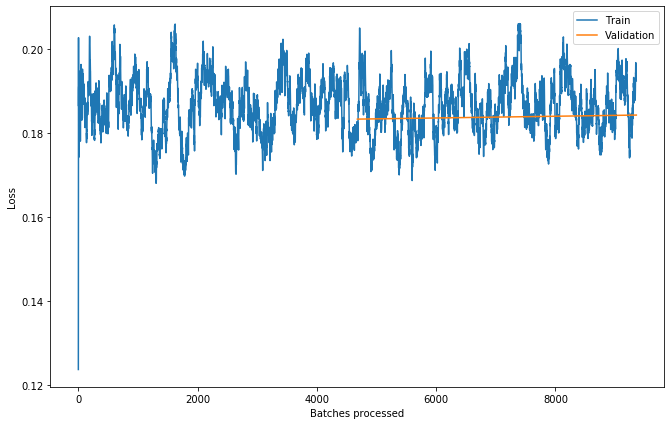

In [43]:
# Analyse our model
learn.model
learn.recorder.plot_losses()

In [44]:
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [45]:
from sklearn.metrics import roc_curve, classification_report, auc

print(classification_report(census_test['income class'], labels))
fpr, tpr, thresholds = roc_curve(census_test['income class'], labels)

print("AUC: %s" % auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     93576
           1       0.35      0.71      0.47      6186

    accuracy                           0.90     99762
   macro avg       0.66      0.81      0.70     99762
weighted avg       0.94      0.90      0.91     99762

AUC: 0.811606775411504


## Prepare submission

In [ ]:
# create submission file to submit in Kaggle competition
submission = pd.DataFrame({'income class': labels})
submission.reset_index(inplace=True)
submission.to_csv('temp/submission_fastai.csv', index=False)
submission.head()